1\. **Kernel Density Estimate**

Produce a KDE for a given distribution (by hand, not using seaborn!):

* Fill a numpy array, x,  of len(N) (with N=O(100)) with a variable normally distributed, with a given mean a standard deviation
* Fill an histogram in pyplot taking properly care about the aesthetic
   * use a meaningful number of bins
   * set a proper y axis label
   * set proper value of y axis major ticks labels (e.g. you want to display only integer labels)
   * display the histograms as data points with errors (the error being the poisson uncertainty)
* for every element of x, create a gaussian with the mean corresponding the element value and std as a parameter that can be tuned. The std default value should be:
$$ 1.06 * x.std() * x.size ^{-\frac{1}{5.}} $$
you can use the scipy function `stats.norm()` for that.
* In a separate plot (to be placed beside the original histogram), plot all the gaussian functions so obtained
* Sum (with np.sum()) all the gaussian functions and normalize the result such that the integral matches the integral of the original histogram. For that you could use the `scipy.integrate.trapz()` method


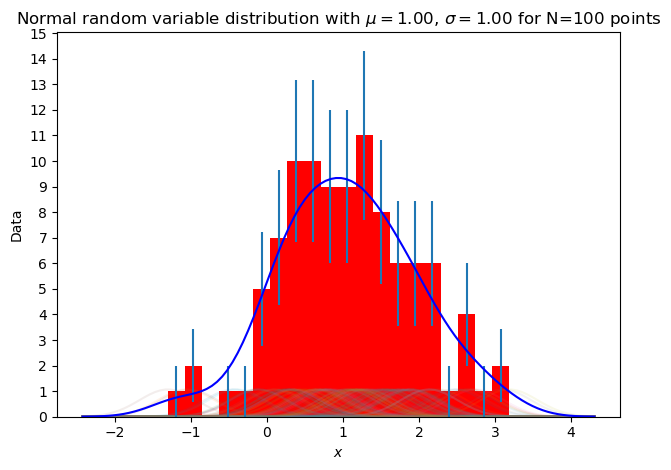

In [3]:
import numpy as np
import numpy.random as npr
import matplotlib.pyplot as plt
from matplotlib.ticker import AutoMinorLocator,MultipleLocator,FuncFormatter
import scipy as sp
from scipy import stats
from scipy import integrate
np.random.seed(1)
sigma=1 #standard deviation
mu=1 #mean
N=np.linspace(0,1,100)
x=npr.randn(len(N))*sigma+mu

bins=20

fig,ax=plt.subplots()
counts,bin_edges, _ =ax.hist(x,color='red',bins=bins,density=False)
bin_widths = np.diff(bin_edges)

ax.set_title(r'Normal random variable distribution with $\mu= %.2f $, $\sigma= %.2f $ for N=%d points'%(mu,sigma,len(N)))
ax.set_xlabel('$x$')
ax.set_ylabel('Data')
ax.tick_params(axis='y',which='minor',bottom=False) # eliminate all non integer ticks
ax.yaxis.set_major_locator(MultipleLocator(1))

errors=np.sqrt(counts)  #Poisson error
bin_centers=0.5*(bin_edges[:-1]+bin_edges[1:])

ax.errorbar(bin_centers,counts,yerr=errors,fmt='none')

def gaussian_v(x,std):
    return stats.norm(loc=x,scale=std)
h = 1.06 * x.std() * len(x) ** (-1/5)    #std default for a kde

gaussian=gaussian_v(x,h) # generate num=bins random variables that goes like normal distribution

x_grid=np.linspace(x.min()-3*h,x.max()+3*h,len(N)) #in this way I cover almost all gaussians

pdf_v=gaussian.pdf(x_grid[:,np.newaxis])

fig2=ax.plot(x_grid,pdf_v,alpha=0.1,zorder=1)

kde_sum=pdf_v.sum(axis=1)

# -----this part is from chatgpt since i did not understand what he requests as normalization
# Integral of histogram:
hist_integral = np.sum(counts * np.diff(bin_edges))

# Integral of KDE curve:
kde_integral = sp.integrate.trapezoid(kde_sum, x_grid)

# Scale KDE to match histogram integral
kde_sum *= hist_integral / kde_integral


ax.plot(x_grid,kde_sum,color='blue')
fig.tight_layout()

2\. **Color-coded scatter plot**

Produce a scatter plot out of a dataset with two categories

* Write a function that generate a 2D datasets of 2 categories. Each category should distribute as a 2D gaussian with a given mean and std (clearly it is better to have different values means..)
* Display the dataset in a scatter plot marking the two categories with different marker colors.

An example is given below

You can try to make the procedure more general by allowing a given number $n\ge 2$ of categories

set a number of Datasets: 2
insert mean 0 for the first dimension: 0
insert std 0 for the first dimension: 1
insert mean 0 for the second dimension: 0
insert std 0 for the first dimension: 1
insert the color: red
insert mean 1 for the first dimension: 2
insert std 1 for the first dimension: 0.1
insert mean 1 for the second dimension: 2
insert std 1 for the first dimension: 0.1
insert the color: blue


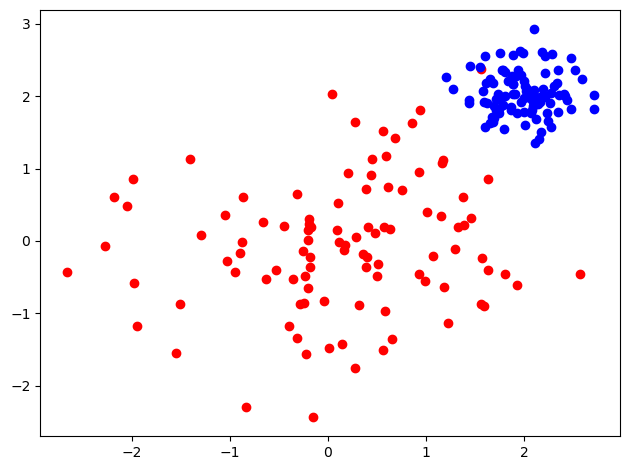

In [4]:
def dataset(mu1,mu2,s1,s2,N):
        samples=np.random.multivariate_normal([mu1,mu2] , [[s1,0],[0,s2]],size=N)
        return samples
#here the version with N=2
#data=dataset(0,0,0.05,0.05,100)   
#data2=dataset(1,1,0.25,0.25,100)
#fig,ax=plt.subplots(figsize=(10,8))
#ax.scatter(data[:,0],data[:,1],color='red')
#ax.scatter(data2[:,0],data2[:,1],color='blue')

#now for a generic N
N=input('set a number of Datasets:')
datasets=[len(N)]
fig,ax_2=plt.subplots()
for i in range(int(N)):
    mu1=input('insert mean %d for the first dimension:'%i)
    s1=input('insert std %d for the first dimension:'%i)
    mu2=input('insert mean %d for the second dimension:'%i)
    s2=input('insert std %d for the first dimension:'%i)
    datasets.append(dataset(float(mu1),float(mu2),float(s1),float(s2),100))
    color=input('insert the color:')
    data = datasets[-1]
    ax_2.scatter(data[:,0],data[:,1],color=color)
fig.tight_layout()

--2026-01-08 19:40:39--  https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
Resolving www.dropbox.com (www.dropbox.com)... 2620:100:6025:18::a27d:4512, 162.125.69.18
Connecting to www.dropbox.com (www.dropbox.com)|2620:100:6025:18::a27d:4512|:443... ^C


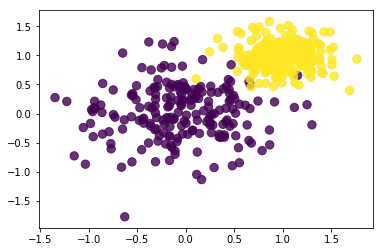

In [5]:
! wget https://www.dropbox.com/s/u4y3k4kk5tc7j46/two_categories_scatter_plot.png
from IPython.display import Image
Image('two_categories_scatter_plot.png')

3\. **Profile plot**

Produce a profile plot from a scatter plot.
* Download the following dataset and load it as a pandas dataframe:
```bash
wget https://www.dropbox.com/s/hgnvyj9abatk8g6/residuals_261.npy
```
Note that you should use the `np.load()` function to load the file as a numpy array, call the `.item()` method, and then pass it to the `pd.DataFrame()` constructor.
* Inspect the dataset, you'll find two variables (features)
* Clean the sample by selecting the entries (rows) with the variable "residual" in absolute value smaller than 2
* perform a linear regression of "residuals" versus "distances" using `scipy.stats.linregress()` 
* plot a seaborn jointplot of  "residuals" versus "distances", having seaborn performing a linear regression. The result of the regression should be displayed on the plot
* Fill 3 numpy arrays
  * x, serving as an array of bin centers for the "distance" variable. It should range from 0 to 20 with reasonable number of steps (bins)
  * y, the mean values of the "residuals", estimated in slices (bins) of "distance"
  * erry, the standard deviation of the  of the "residuals", estimated in slices (bins) of "distance"
* Plot the profile plot on top of the scatter plot

linreg results slope: 0.00 and intercept: -0.15


<ErrorbarContainer object of 3 artists>

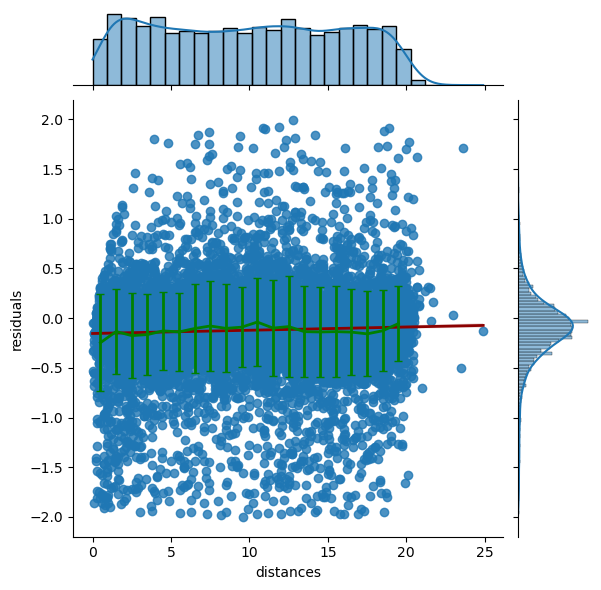

In [6]:
import pandas as pd
import seaborn as sns

file_name='/home/turino/UNI/I/LCP/LaboratoryOfComputationalPhysics_Y8/residuals_261.npy'
data_array=np.load(file_name,allow_pickle=True)
data=data_array.item()
df=pd.DataFrame(data)

df=df[abs(df['residuals'])<2]

linreg=stats.linregress(df['distances'],df['residuals'])
slope, intercept = linreg.slope, linreg.intercept
print("linreg results slope: %.2f and intercept: %.2f"%(slope,intercept))

reg=sns.jointplot(df,x='distances',y='residuals',kind='reg',line_kws={"color": "darkred", "linewidth": 2})
n_bin=20
xmin,xmax=0,20
y=np.zeros(n_bin)
erry=np.zeros(n_bin)
bins=np.linspace(xmin,xmax,n_bin+1)
bins_center=0.5*(bins[:-1]+bins[1:])

for i in range(n_bin):
    mask=(df["distances"] >= bins[i]) & (df["distances"] < bins[i+1]) #with this mask i put the data in the respective bins
    y[i]=df.loc[mask,'residuals'].mean()
    erry[i]=df.loc[mask,'residuals'].std()

reg.ax_joint.errorbar(bins_center,y,yerr=erry,color="green",linewidth=2, capsize=3 ) # joint the errorbar plot
